In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('train.csv')
dft = pd.read_csv('test.csv')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dft.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
full = df.append(dft)

In [7]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [8]:
df.shape

(1460, 81)

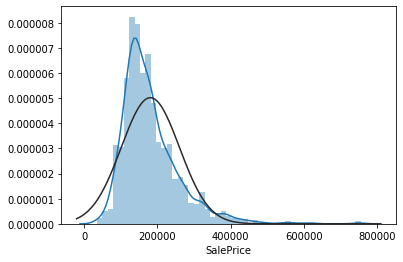

In [9]:
sns.distplot(df['SalePrice'],fit = stats.norm)

In [10]:
mu,sigma = stats.norm.fit(df['SalePrice'])

In [11]:
# mu, sigma

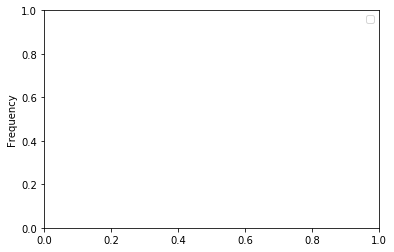

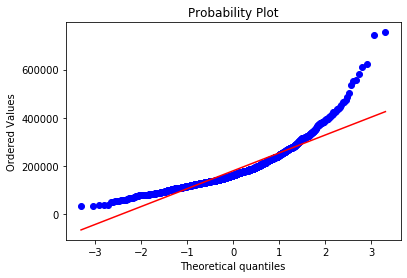

In [12]:
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df['SalePrice'], plot=plt)
plt.show()

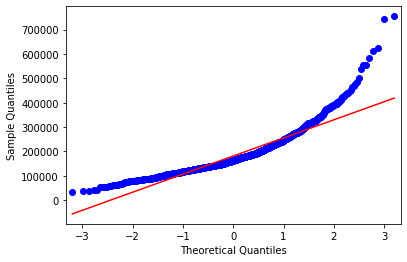

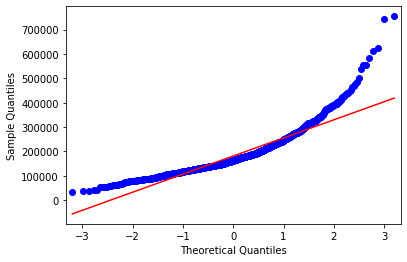

In [13]:
sm.qqplot(df['SalePrice'],line = 'r')

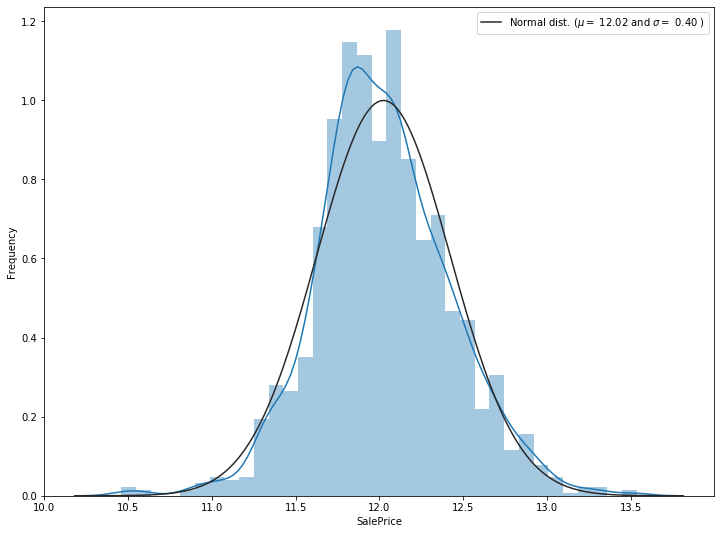

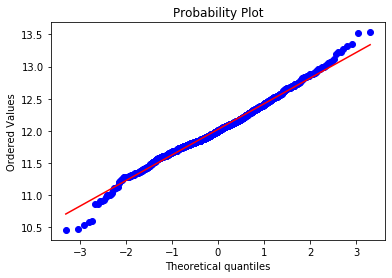

In [14]:
df['SalePrice'] = np.log(df['SalePrice']+1)

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(df['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df['SalePrice'], plot=plt)
plt.show()


In [15]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [16]:
Isnull  = df.isnull().sum()/len(df) * 100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace = True,ascending = False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [17]:
Isnull = Isnull.to_frame()

In [18]:
Isnull.columns = ['count']
Isnull.index.names = ['Name']
Isnull['Name'] = Isnull.index

In [19]:
Isnull

,count,Name
Name,,
PoolQC,99.520548,PoolQC
MiscFeature,96.301370,MiscFeature
Alley,93.767123,Alley
Fence,80.753425,Fence
FireplaceQu,47.260274,FireplaceQu
LotFrontage,17.739726,LotFrontage
GarageYrBlt,5.547945,GarageYrBlt
GarageType,5.547945,GarageType
GarageFinish,5.547945,GarageFinish


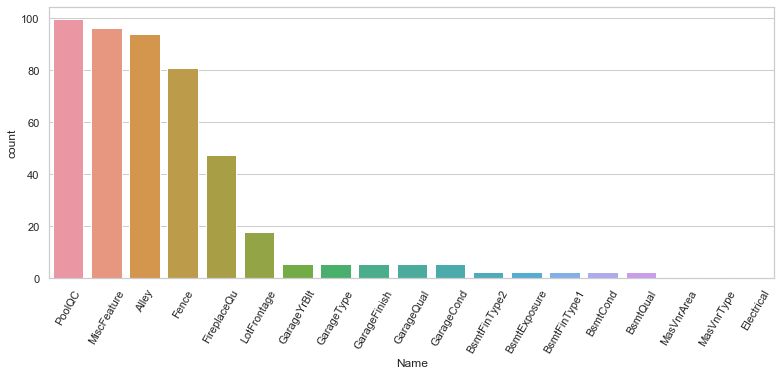

In [20]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 60)
plt.show()

In [21]:
df_corr = df.select_dtypes(include=[np.number])

In [22]:
df_corr.shape

(1460, 38)

In [23]:
df_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429220
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,11.870607
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,12.634606
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,12.206078
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,11.774528
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,11.678448


In [24]:
#Delete Id because that is not need for corralation plot
del df_corr['Id']

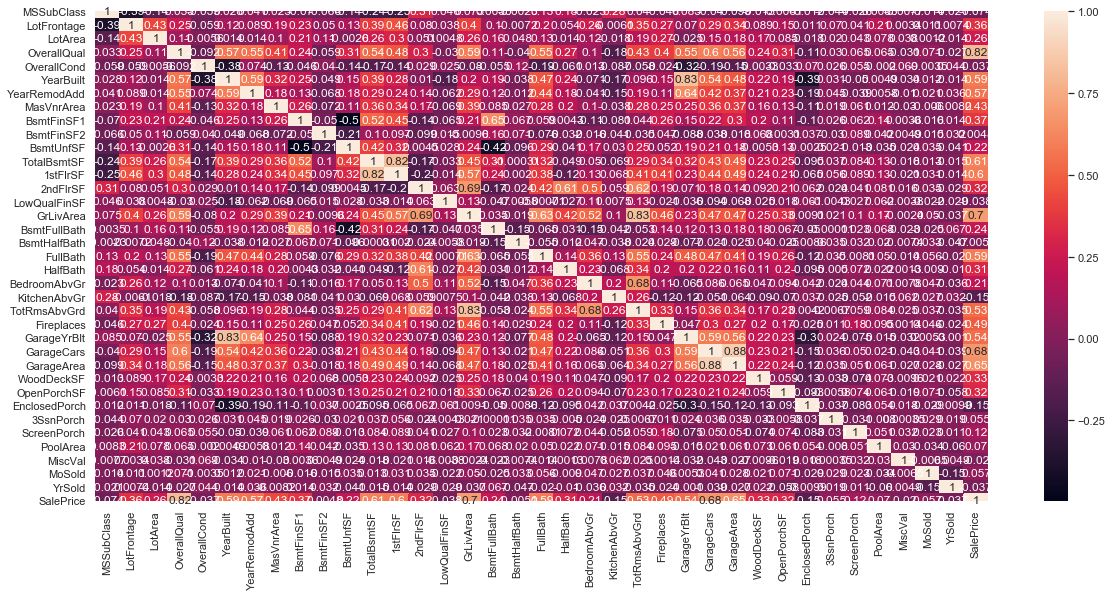

In [25]:
corr = df_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

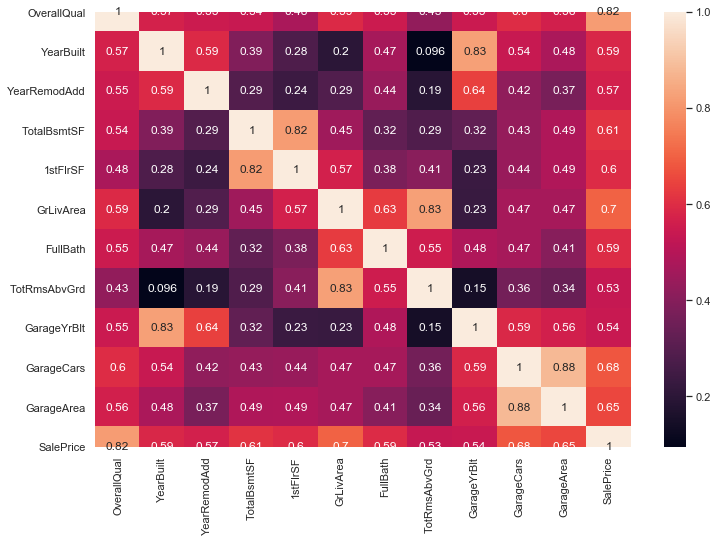

In [26]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [27]:
num_cols = list(df.select_dtypes(include = np.number))

In [28]:
num_colst = list(dft.select_dtypes(include = np.number))

In [29]:
dfn = df[num_cols]
dftn = dft[num_colst]

In [30]:
# dfn.isnull().sum()

In [31]:
# dftn.isnull().sum()

In [32]:
dfn['LotFrontage'].fillna(dfn['LotFrontage'].mode()[0],inplace = True)
dftn['LotFrontage'].fillna(dftn['LotFrontage'].mode()[0],inplace = True)

In [33]:
dfn['MasVnrArea'].fillna(dfn['MasVnrArea'].mode()[0],inplace = True)
dftn['MasVnrArea'].fillna(dftn['MasVnrArea'].mode()[0],inplace = True)


In [34]:
dfn['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [35]:
dfn['GarageYrBlt'].fillna(dfn['GarageYrBlt'].median(),inplace = True)
dftn['GarageYrBlt'].fillna(dftn['GarageYrBlt'].median(),inplace = True)

dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [36]:
dftn.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       1
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [37]:
dftn['BsmtFinSF1'].fillna(method='ffill',inplace = True)
dftn['BsmtFinSF2'].fillna(method='ffill',inplace = True)
dftn['BsmtUnfSF'].fillna(method='ffill',inplace = True)
dftn['TotalBsmtSF'].fillna(method='ffill',inplace = True)
dftn['BsmtFullBath'].fillna(method='ffill',inplace = True)
dftn['BsmtHalfBath'].fillna(method='ffill',inplace = True)
dftn['GarageCars'].fillna(method='ffill',inplace = True)
dftn['GarageArea'].fillna(method='ffill',inplace = True)

In [38]:
dftn.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [39]:
dfn['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [40]:
dfn['MasVnrArea'] = dfn['MasVnrArea'].astype(float)
dfn.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [41]:
dfn.drop('Id',axis = 1,inplace = True)
dftn.drop('Id',axis = 1,inplace = True)


In [42]:
for col in dfn.columns:
    print(' ')
    print(col)
    print(dfn[col].value_counts())

 
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
 
LotFrontage
60.0     402
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0      

0      656
36      29
48      22
20      21
40      19
45      19
30      16
24      16
60      15
39      14
28      14
44      13
50      13
54      13
72      12
98      11
63      11
35      11
32      11
75      10
42      10
120     10
96      10
64       9
66       9
16       8
78       8
56       8
38       8
84       8
68       8
70       8
80       7
144      7
102      7
27       7
130      7
33       7
25       7
114      7
22       6
46       6
26       6
55       6
140      6
51       6
100      6
116      6
150      5
90       5
74       5
65       5
108      5
76       5
112      5
110      5
104      5
128      5
62       5
88       5
18       5
29       5
21       5
59       5
49       4
154      4
57       4
113      4
52       4
82       4
105      4
168      4
34       4
132      3
47       3
81       3
69       3
136      3
234      3
124      3
73       3
61       3
122      3
111      3
192      3
53       3
151      3
158      3
184      3
166      3
12       3

In [43]:
co = list(dfn['OverallQual'].value_counts().head(5).index)
dfn['OverallQual'] = np.where(dfn['OverallQual'].isin(co),dfn['OverallQual'],'Other')
co = list(dftn['OverallQual'].value_counts().head(5).index)
dftn['OverallQual'] = np.where(dftn['OverallQual'].isin(co),dftn['OverallQual'],'Other')

In [44]:
co = list(dfn['OverallCond'].value_counts().head(3).index)
dfn['OverallCond'] = np.where(dfn['OverallCond'].isin(co),dfn['OverallCond'],'Other')

co = list(dftn['OverallCond'].value_counts().head(3).index)
dftn['OverallCond'] = np.where(dftn['OverallCond'].isin(co),dftn['OverallCond'],'Other')

In [45]:
cd = list(dfn['YearBuilt'].value_counts().head(10).index)
dfn['YearBuilt'] = np.where(dfn['YearBuilt'].isin(cd),dfn['YearBuilt'],'Other')

cd = list(dftn['YearBuilt'].value_counts().head(10).index)
dftn['YearBuilt'] = np.where(dftn['YearBuilt'].isin(cd),dftn['YearBuilt'],'Other')

In [46]:
cf = list(dfn['YearRemodAdd'].value_counts().head(10).index)
dfn['YearRemodAdd'] = np.where(dfn['YearRemodAdd'].isin(cf),dfn['YearRemodAdd'],'Other')
cf = list(dftn['YearRemodAdd'].value_counts().head(10).index)
dftn['YearRemodAdd'] = np.where(dftn['YearRemodAdd'].isin(cf),dftn['YearRemodAdd'],'Other')

In [47]:
ce = list(dfn['GarageYrBlt'].value_counts().head(10).index)
dfn['GarageYrBlt'] = np.where(dfn['GarageYrBlt'].isin(ce),dfn['GarageYrBlt'],'Other')

ce = list(dftn['GarageYrBlt'].value_counts().head(10).index)
dftn['GarageYrBlt'] = np.where(dftn['GarageYrBlt'].isin(ce),dftn['GarageYrBlt'],'Other')

In [48]:
cg = list(dfn['GarageCars'].value_counts().head(3).index)
dfn['GarageCars'] = np.where(dfn['GarageCars'].isin(cg),dfn['GarageCars'],'Other')

cg = list(dftn['GarageCars'].value_counts().head(3).index)
dftn['GarageCars'] = np.where(dftn['GarageCars'].isin(cg),dftn['GarageCars'],'Other')

In [49]:
cat_cols = ['OverallQual','OverallCond','YearBuilt','GarageYrBlt','GarageCars','YearRemodAdd']

In [50]:
dfn=pd.get_dummies(dfn,columns=cat_cols,drop_first=True)
dftn=pd.get_dummies(dftn,columns=cat_cols,drop_first=True)

In [51]:
print(dfn.shape)
print(dftn.shape)

(1460, 72)
(1459, 71)


In [52]:
X = dfn.drop('SalePrice',axis = 1)
y = dfn['SalePrice']

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

In [55]:
rf = RandomForestRegressor()
rf = rf.fit(X_train, y_train)
y_pred =  rf.predict(X_test)
rf.score(X_test,y_test)

0.8494955226333648

In [56]:
r2_score(y_test,y_pred)

0.8494955226333648

In [57]:
print('RMSe : ',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSe :  0.15978789938072585


In [58]:
dfn.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other,OverallCond_6,OverallCond_7,OverallCond_Other,YearBuilt_1959,YearBuilt_1976,YearBuilt_1977,YearBuilt_1999,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_Other,GarageYrBlt_1980.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_Other,GarageCars_2,GarageCars_3,GarageCars_Other,YearRemodAdd_1996,YearRemodAdd_2000,YearRemodAdd_2002,YearRemodAdd_2003,YearRemodAdd_2004,YearRemodAdd_2005,YearRemodAdd_2006,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_Other
0,60,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,548,0,61,0,0,0,0,0,2,2008,12.247699,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,20,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,460,298,0,0,0,0,0,0,5,2007,12.109016,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,608,0,42,0,0,0,0,0,9,2008,12.317171,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
3,70,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,642,0,35,272,0,0,0,0,2,2006,11.849405,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,836,192,84,0,0,0,0,0,12,2008,12.429220,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0


In [59]:
dftn.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other,OverallCond_6,OverallCond_7,OverallCond_Other,YearBuilt_1920,YearBuilt_1956,YearBuilt_1999,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_Other,GarageYrBlt_1977.0,GarageYrBlt_1979.0,GarageYrBlt_2000.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_Other,GarageCars_2.0,GarageCars_3.0,GarageCars_Other,YearRemodAdd_1998,YearRemodAdd_2000,YearRemodAdd_2002,YearRemodAdd_2003,YearRemodAdd_2004,YearRemodAdd_2005,YearRemodAdd_2006,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_Other
0,20,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,730.0,140,0,0,0,120,0,0,6,2010,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,20,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,312.0,393,36,0,0,0,0,12500,6,2010,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,482.0,212,34,0,0,0,0,0,3,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,60,78.0,9978,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,470.0,360,36,0,0,0,0,0,6,2010,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
4,120,43.0,5005,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,506.0,0,82,0,0,144,0,0,1,2010,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [60]:
def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: #check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

 ### XGBOOSt 

In [61]:
X = dfn.drop('SalePrice',axis = 1)
y = dfn['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

In [62]:
from xgboost import XGBRegressor

In [63]:
xgb = XGBRegressor()
xgb = xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

[23:42:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [64]:
xgb.score(X_test,y_test)

0.8534100317583797

In [65]:
r2_score(y_test,y_pred)

0.8534100317583797

In [66]:
print('RMSe : ',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSe :  0.15769622706519965


In [67]:
# rmsle(y_test,y_pred)

In [68]:
X = dfn.drop('SalePrice',axis = 1)
y = dfn['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

In [69]:
from sklearn.metrics import mean_squared_error
def adjusted_r2_score(y_true, y_pred, X_test):
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true) - X_test.shape[1]-1)
    return adjusted_r2

In [70]:
xgr = XGBRegressor(objective='reg:linear', n_estimators=50, max_depth=5, n_jobs=-1, random_state=42)
xgr.fit(X_train, y_train)

y_pred = xgr.predict(X_test)

rsq_baseline2_xgb = r2_score(y_true=y_test, y_pred=y_pred)
adj_rsq_baseline2_xgb = adjusted_r2_score(y_true=y_test, y_pred=y_pred, X_test=X_test)
rmse_baseline2_xgb = mean_squared_error(y_true=y_test, y_pred=y_pred) ** 0.5
print('R-sq:', rsq_baseline2_xgb)
print('Adj. R-sq:', adj_rsq_baseline2_xgb)
print('RMSE:', rmse_baseline2_xgb)

[23:42:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-sq: 0.8213927317515148
Adj. R-sq: 0.7867448737033115
RMSE: 0.17406792067270407


### Decision Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
X = dfn.drop('SalePrice',axis = 1)
y = dfn['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

In [73]:
dt = DecisionTreeRegressor()
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [74]:

print('r2_score: ',r2_score(y_test,y_pred))
print('Accuracy: ',dt.score(X_test,y_test))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('adj r sq.: ',1 - (1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1) )

r2_score:  0.6587203255736904
Accuracy:  0.6587203255736904
RMSE:  0.2406159371322797
adj r sq.:  0.5925157985674938


### Grid Search CV

In [75]:
from sklearn.model_selection import GridSearchCV


In [76]:
# # rf = RandomForestRegressor()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# rfc = RandomForestRegressor(n_jobs=-1 , oob_score = True,random_state = 42) 

# param_grid = {
#     'n_estimators': [50,100,200, 700],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train,y_train)
# print('\n',CV_rfc.best_estimator_)

In [77]:
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
                      oob_score=True, random_state=42, verbose=0,
                      warm_start=False)


X = dfn.drop('SalePrice',axis = 1)
y = dfn['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
# y_pred = np.exp(y_pred-1)
print('r2_score: ',r2_score(y_test,y_pred))
print('Accuracy: ',dt.score(X_test,y_test))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('adj r sq.: ',1 - (1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1) )

r2_score:  0.8559562374613895
Accuracy:  0.6587203255736904
RMSE:  0.15632066932649935
adj r sq.:  0.82801332177767


In [78]:
X.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other,OverallCond_6,OverallCond_7,OverallCond_Other,YearBuilt_1959,YearBuilt_1976,YearBuilt_1977,YearBuilt_1999,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_Other,GarageYrBlt_1980.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_Other,GarageCars_2,GarageCars_3,GarageCars_Other,YearRemodAdd_1996,YearRemodAdd_2000,YearRemodAdd_2002,YearRemodAdd_2003,YearRemodAdd_2004,YearRemodAdd_2005,YearRemodAdd_2006,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_Other
0,60,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,548,0,61,0,0,0,0,0,2,2008,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,20,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,460,298,0,0,0,0,0,0,5,2007,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,608,0,42,0,0,0,0,0,9,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
3,70,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,642,0,35,272,0,0,0,0,2,2006,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,836,192,84,0,0,0,0,0,12,2008,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0


In [79]:
dftn.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other,OverallCond_6,OverallCond_7,OverallCond_Other,YearBuilt_1920,YearBuilt_1956,YearBuilt_1999,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_Other,GarageYrBlt_1977.0,GarageYrBlt_1979.0,GarageYrBlt_2000.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_Other,GarageCars_2.0,GarageCars_3.0,GarageCars_Other,YearRemodAdd_1998,YearRemodAdd_2000,YearRemodAdd_2002,YearRemodAdd_2003,YearRemodAdd_2004,YearRemodAdd_2005,YearRemodAdd_2006,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_Other
0,20,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,730.0,140,0,0,0,120,0,0,6,2010,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,20,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,312.0,393,36,0,0,0,0,12500,6,2010,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,482.0,212,34,0,0,0,0,0,3,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,60,78.0,9978,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,470.0,360,36,0,0,0,0,0,6,2010,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
4,120,43.0,5005,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,506.0,0,82,0,0,144,0,0,1,2010,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [80]:
pred = rf.predict(dftn)

In [81]:
predantilog = np.exp(pred)-1

In [82]:
predantilog

array([124861.71972703, 154071.65470913, 175643.24260965, ...,
       169234.18300316, 110311.83133781, 236695.30408829])

In [83]:
import xgboost as xgb

In [84]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [102]:
# X_train.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other,OverallCond_6,OverallCond_7,OverallCond_Other,YearBuilt_1959,YearBuilt_1976,YearBuilt_1977,YearBuilt_1999,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_Other,GarageYrBlt_1980.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_Other,GarageCars_2,GarageCars_3,GarageCars_Other,YearRemodAdd_1996,YearRemodAdd_2000,YearRemodAdd_2002,YearRemodAdd_2003,YearRemodAdd_2004,YearRemodAdd_2005,YearRemodAdd_2006,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_Other
135,20,80.0,10400,288.0,0,0,1304,1304,1682,0,0,1682,0,0,2,0,3,1,7,1,530,98,0,0,0,0,0,0,5,2008,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1452,180,35.0,3675,80.0,547,0,0,547,1072,0,0,1072,1,0,1,0,2,1,5,0,525,0,28,0,0,0,0,0,5,2006,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
762,60,72.0,8640,0.0,24,0,732,756,764,783,0,1547,0,0,2,1,3,1,7,0,614,169,45,0,0,0,0,0,6,2010,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
932,20,84.0,11670,302.0,0,0,1905,1905,1905,0,0,1905,0,0,2,0,3,1,8,1,788,0,191,0,0,0,0,0,3,2007,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
435,60,43.0,10667,0.0,385,344,70,799,827,834,0,1661,1,0,2,1,3,1,6,1,550,158,61,0,0,0,0,0,4,2009,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0


In [85]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 20, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[23:42:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [86]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,10.381540,0.006903,10.381525,0.016134
1,9.347098,0.006182,9.347081,0.016801
2,8.416164,0.005528,8.416152,0.017396
3,7.578437,0.004940,7.578419,0.017920
4,6.824610,0.004405,6.824594,0.018383


In [87]:
print((cv_results["test-rmse-mean"]).tail(1))


49    0.226349
Name: test-rmse-mean, dtype: float64


In [88]:
# xg = XGBRegressor(n_jobs = -1)
# params = {
#         'max_depth' : [10,20],
#         'learning_rate' : [0.1,0.2],
#         'n_estimators' : [100,200],
#         "subsample" : [0.5, 0.8]
        
#         }

# grid = GridSearchCV(estimator = xg,param_grid=params,cv = 5,n_jobs = -1)
# grid.fit(X_train,y_train)
# grid.best_params_

[23:43:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100, 'subsample': 0.8}

In [89]:
xg  = XGBRegressor(max_depth = 20,subsample=0.8).fit(X_train,y_train)
predic = xg.predict(X_test)
print('r2_score: ',r2_score(y_test,predic))
print('Accuracy: ',dt.score(X_test,predic))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predic)))
print('adj r sq.: ',1 - (1-r2_score(y_test,predic))*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1) )


[23:43:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2_score:  0.8546486928274503
Accuracy:  0.7244736628260949
RMSE:  0.15702856009138672
adj r sq.:  0.8264521277748518


In [90]:
xg.feature_importances_

array([0.00125656, 0.00135359, 0.00266517, 0.00096811, 0.01128904,
       0.00250375, 0.0023846 , 0.02900313, 0.00404712, 0.00676991,
       0.00726984, 0.05557009, 0.01029724, 0.00263836, 0.1196699 ,
       0.01713001, 0.00514717, 0.0919105 , 0.00305172, 0.07036786,
       0.01962094, 0.00439895, 0.00856396, 0.0040754 , 0.00160439,
       0.00279627, 0.04387087, 0.00467165, 0.00220829, 0.00139497,
       0.02542711, 0.00518164, 0.02542921, 0.0484646 , 0.07383692,
       0.00281802, 0.00315027, 0.01123135, 0.00271151, 0.00272034,
       0.01345919, 0.00131952, 0.00091887, 0.00197059, 0.00235538,
       0.00078425, 0.01091255, 0.00324688, 0.00629972, 0.00074564,
       0.00519388, 0.00049473, 0.00409987, 0.00346507, 0.00068072,
       0.00436697, 0.0097578 , 0.00154865, 0.00398943, 0.15318298,
       0.        , 0.00421368, 0.00211936, 0.00146668, 0.00130201,
       0.00084073, 0.00244686, 0.00303532, 0.0064094 , 0.00815795,
       0.00174487], dtype=float32)

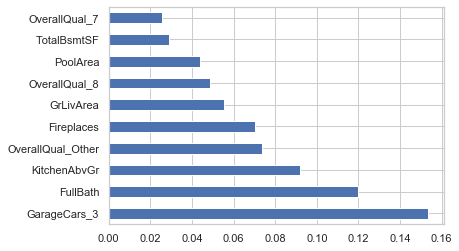

In [91]:
feat_importances = pd.Series(xg.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [92]:
X.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other,OverallCond_6,OverallCond_7,OverallCond_Other,YearBuilt_1959,YearBuilt_1976,YearBuilt_1977,YearBuilt_1999,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_Other,GarageYrBlt_1980.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_Other,GarageCars_2,GarageCars_3,GarageCars_Other,YearRemodAdd_1996,YearRemodAdd_2000,YearRemodAdd_2002,YearRemodAdd_2003,YearRemodAdd_2004,YearRemodAdd_2005,YearRemodAdd_2006,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_Other
0,60,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,548,0,61,0,0,0,0,0,2,2008,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,20,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,460,298,0,0,0,0,0,0,5,2007,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,608,0,42,0,0,0,0,0,9,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
3,70,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,642,0,35,272,0,0,0,0,2,2006,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,836,192,84,0,0,0,0,0,12,2008,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0


In [93]:
X.shape

(1460, 71)

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
X_std = pd.DataFrame(StandardScaler().fit_transform(X),columns = X.columns)

In [96]:
cov_matrix = np.cov(X_std.T)
print(']n Covariance Matrix \n%s',cov_matrix)

]n Covariance Matrix 
%s [[ 1.0006854  -0.34935513 -0.13987689 ... -0.02803324 -0.03732392
   0.00870366]
 [-0.34935513  1.0006854   0.28147541 ...  0.05532079  0.09906982
   0.00185642]
 [-0.13987689  0.28147541  1.0006854  ... -0.01609649  0.03221846
   0.04321538]
 ...
 [-0.02803324  0.05532079 -0.01609649 ...  1.0006854  -0.03935701
  -0.23903763]
 [-0.03732392  0.09906982  0.03221846 ... -0.03935701  1.0006854
  -0.17120378]
 [ 0.00870366  0.00185642  0.04321538 ... -0.23903763 -0.17120378
   1.0006854 ]]


In [97]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Values \n%s',eig_vals)
print('Eigen Vectors \n%s',eig_vecs)

Eigen Values 
%s [ 6.97413116e+00+0.0000000e+00j  4.04340071e+00+0.0000000e+00j
  3.46924335e+00+0.0000000e+00j  3.02459877e+00+0.0000000e+00j
  2.64132142e+00+0.0000000e+00j  2.46076276e+00+0.0000000e+00j
  2.37322094e+00+0.0000000e+00j  2.28454546e+00+0.0000000e+00j
  2.15298286e+00+0.0000000e+00j  1.79870661e+00+0.0000000e+00j
  1.73277193e+00+0.0000000e+00j  1.57914813e+00+0.0000000e+00j
  1.47052745e+00+0.0000000e+00j  1.44446714e+00+0.0000000e+00j
  1.38046463e+00+0.0000000e+00j  1.33254993e+00+0.0000000e+00j
  1.26144167e+00+0.0000000e+00j  1.26719156e-02+0.0000000e+00j
  2.30219459e-02+0.0000000e+00j  3.63734336e-02+0.0000000e+00j
  5.92285458e-02+0.0000000e+00j  6.08887443e-02+0.0000000e+00j
  7.52250906e-02+0.0000000e+00j  8.06941987e-02+0.0000000e+00j
  8.66421186e-02+0.0000000e+00j  9.98042973e-02+0.0000000e+00j
  1.16073378e-01+0.0000000e+00j  1.31259715e-01+0.0000000e+00j
  1.23524008e-01+0.0000000e+00j  1.88697340e-01+0.0000000e+00j
  1.95860557e-01+0.0000000e+00j  2.317

In [98]:
eigen_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
tot  = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals,reverse = True)]
cum_var_exp = np.cumsum(var_exp)
print('Cumulative VAriance Explained',cum_var_exp)

Cumulative VAriance Explained [  9.81599205+0.00000000e+00j  15.50702199+0.00000000e+00j
  20.38993347+0.00000000e+00j  24.64701393+0.00000000e+00j
  28.36463688+0.00000000e+00j  31.82812605+0.00000000e+00j
  35.16840133+0.00000000e+00j  38.38386711+0.00000000e+00j
  41.41416037+0.00000000e+00j  43.94581476+0.00000000e+00j
  46.38466702+0.00000000e+00j  48.60729592+0.00000000e+00j
  50.67704273+0.00000000e+00j  52.71011003+0.00000000e+00j
  54.65309469+0.00000000e+00j  56.52864007+0.00000000e+00j
  58.30410158+0.00000000e+00j  59.99266061+0.00000000e+00j
  61.66740378+0.00000000e+00j  63.28980531+0.00000000e+00j
  64.85598351+0.00000000e+00j  66.40924468+0.00000000e+00j
  67.95641807+0.00000000e+00j  69.44475036+0.00000000e+00j
  70.89999593+0.00000000e+00j  72.32334   +0.00000000e+00j
  73.72973503+0.00000000e+00j  75.12085231+0.00000000e+00j
  76.46263509+0.00000000e+00j  77.76170572+0.00000000e+00j
  79.03388113+0.00000000e+00j  80.30122853+0.00000000e+00j
  81.53281349+0.00000000e+

In [103]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler() 
X_train = scX.fit_transform(X_train) 
X_test = scX.fit_transform(X_test)

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None) 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explainedvariance = pca.explained_variance_ratio_

In [137]:
# rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
#                       max_features='sqrt', max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
#                       oob_score=True, random_state=42, verbose=0,
#                       warm_start=False)
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
rf = xgb.XGBRegressor(max_depth=3)
predicts = rf.fit(X_train,y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test,predicts))

[00:21:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.16344850480425985

In [106]:
# dftn = scX.fit_transform(dftn) 
# dftn = pca.fit_transform(dftn)

In [107]:
# predictrf = rf.predict(dftn)

In [108]:
# predictrfanti = np.exp(predictrf)-1

In [138]:
xg  = XGBRegressor(max_depth = 20,subsample=0.8).fit(X_train,y_train)
predic = xg.predict(X_test)
print('r2_score: ',r2_score(y_test,predic))
print('Accuracy: ',dt.score(X_test,predic))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predic)))
print('adj r sq.: ',1 - (1-r2_score(y_test,predic))*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1) )


[00:22:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2_score:  0.8283384455700172
Accuracy:  -5.102940293946707
RMSE:  0.17064976629640838
adj r sq.:  0.7950379800931626


### The best results were given by Random Forest with hyperparameters tuning and rmse of 0.17

In [111]:
t = pd.read_csv('test.csv')
submission_predicted = pd.DataFrame({'Id' : t['Id'],'SalePrice':predantilog })
submission_predicted.head()

,Id,SalePrice
0,1461,124861.719727
1,1462,154071.654709
2,1463,175643.242610
3,1464,180767.719205
4,1465,185557.933364


In [110]:
submission_predicted.to_csv('submissionv1.csv',index = False)